<a href="https://colab.research.google.com/github/Ahmadsaidnouh/Term7-Artificial-Intelligence-Assignments/blob/main/lab4/jupyter%20notebooks/NLP_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install transformers
%pip install pandas 
%pip install torch
%pip install tqdm
%pip install nltk

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from torch import nn
from torch.optim import Adam
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
datapath = f"/content/drive/MyDrive/bonusData/IMDB Dataset.csv"
df = pd.read_csv(datapath)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


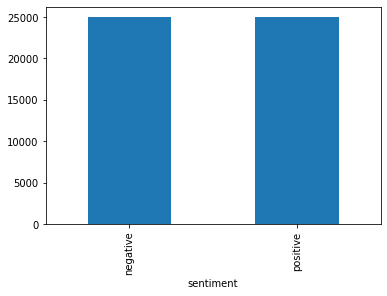

In [5]:
df.groupby(["sentiment"]).size().plot.bar()

In [6]:
stop_words = set(stopwords.words('english'))

temp = df['review']
i = 0
for sentence in temp:
  text=[]
  sentence = re.sub(r'[^\w\s]','',sentence).lower()
  sentence = nltk.word_tokenize(sentence)
  lemmatizer = WordNetLemmatizer()
  for word in sentence:
    if word not in stop_words:
      word = lemmatizer.lemmatize(word)
      word = word.lower()
      text.append(word)
  sentence = " ".join(text)
  temp[i] = sentence
  i += 1
df['review'] = temp
df

,review,sentiment
0,one reviewer mentioned watching 1 oz episode y...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,im going disagree previous comment side maltin...,negative


In [7]:
g = df.groupby(["sentiment"])
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
negative, positive = g.iloc[: len(g) // 2], g[len(g) // 2 :]
negative

review sentiment
sentiment                                                                   
negative  0      return sender aka convicted almost imperfect o...  negative
          1      always liked carry film doublemeaning sexual i...  negative
          2      wonder pamela springsteen gave acting become f...  negative
          3      think two year ago since seen movie till day w...  negative
          4      two tower house performer pitched least expect...  negative
...                                                            ...       ...
          24995  think piece garbage best proof good idea destr...  negative
          24996  many classic movie made leading people outand ...  negative
          24997  wouldnt given film low rating 2 average hadnt ...  negative
          24998  dilemmaabove debbie must face close sam sherma...  negative
          24999  movie wasted 2 hour time make wan na scream la...  negative

[25000 rows x 2 columns]

In [8]:
np.random.seed(112)
df_train_positive, df_val_positive, df_test_positive = np.split(
    positive.sample(frac=1, random_state=42),
    [int(0.7 * len(positive)), int(0.8 * len(positive))],
)

print(len(df_train_positive), len(df_val_positive), len(df_test_positive))


17500 2500 5000


In [9]:
np.random.seed(112)
df_train_negative, df_val_negative, df_test_negative = np.split(
    negative.sample(frac=1, random_state=42),
    [int(0.7 * len(negative)), int(0.8 * len(negative))],
)

print(len(df_train_negative), len(df_val_negative), len(df_test_negative))


17500 2500 5000


In [10]:
df_train = pd.concat([df_train_positive, df_train_negative])
df_val = pd.concat([df_val_positive, df_val_negative]).reset_index(drop=True)
df_test = pd.concat([df_test_positive, df_test_negative]).reset_index(drop=True)

print(len(df_train), len(df_val), len(df_test))
df_train


35000 5000 10000


review sentiment
sentiment                                                                   
positive  6868   watched fair bit bollywood film growing know t...  positive
          24016  tony scott make good film bad personally think...  positive
          9668   might best movie 2006 movie excite think about...  positive
          13640  damn good little ninety thriller perhaps lacki...  positive
          14018  whoever play part j douglas williamson strip p...  positive
...                                                            ...       ...
negative  9730   movie terrible couldnt fast forward fast enoug...  negative
          21746  swedish splatter movie world gone insanebr br ...  negative
          21454  coc moment enjoyed action sequence despised sc...  negative
          7734   lance used get quality support work james came...  negative
          885    read online review praising obscure outing com...  negative

[35000 rows x 2 columns]

In [11]:
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_val = df_val.sample(frac=1).reset_index(drop=True)

print(len(df_train), len(df_val), len(df_test))
df_train


35000 5000 10000


,review,sentiment
0,hard time sitting every single twist turn pred...,negative
1,first picked film intrigued basic idea eager s...,negative
2,slipknot hardcore rock band de moines iowa nin...,positive
3,well glad watched hbo instead paying theater v...,negative
4,many thing wrong moviebr br jeff bridge weird ...,negative
...,...,...
34995,must admit type film would normally eschew ren...,positive
34996,modern tv classic story go like bob girlfriend...,positive
34997,movie make want throw sword ive seen schlock t...,negative
34998,costly film produced sir alexander korda hg we...,positive


In [12]:
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
labels = {
    "negative": 0,
    "positive": 1,
}


class Dataset(torch.utils.data.Dataset):
    def __init__(self, df):

        self.labels = [labels[label] for label in df["sentiment"]]
        self.texts = [
            tokenizer(
                text,
                padding="max_length",
                max_length=512,
                truncation=True,
                return_tensors="pt",
            )
            for text in df["review"]
        ]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y


Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [13]:
class BertClassifier(nn.Module):
    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout_bert = nn.Dropout(0.5)
        self.dropout = nn.Dropout(0.2)
        self.linear1 = nn.Linear(768, 512)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.linear2 = nn.Linear(512, 256)
        self.batchnorm2 = nn.BatchNorm1d(256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 64)
        self.linear_out = nn.Linear(64, 1)
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()
        self.relu3 = nn.ReLU()
        self.relu4 = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_id, mask):
        _, x = self.bert(input_ids=input_id, attention_mask=mask,return_dict=False)
        x = self.dropout_bert(x)
        x = self.relu1(self.linear1(x))
        x = self.batchnorm1(x)
        x = self.dropout(x)
        x = self.relu2(self.linear2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.relu3(self.linear3(x))
        x = self.dropout(x)
        x = self.relu4(self.linear4(x))
        x = self.dropout(x)
        x = self.sigmoid(self.linear_out(x))
        return x


In [14]:
def save_checkpoint(model, epoch, optimizer, best_acc, modelpath):
  state = {
      'epoch' : epoch + 1,
      'model' : model.state_disct(),
      'best accuracy' : best_acc,
      'optimizer' : optimizer.state_dict()
  }
  torch.save(state, modelpath)

In [15]:
batch_size=16
train, val, test = Dataset(df_train), Dataset(df_val), Dataset(df_test)
train_dataloader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(test, batch_size=batch_size)

In [16]:
epoch_list = list()
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()

# def train(model, train_data, val_data, learning_rate, epochs, bach_size, device):
def train(model,train_data, val_data, train_dataloader, val_dataloader, learning_rate, epochs, bach_size, modelpath):
                                  
    # Early stopping
    the_last_loss = 100
    patience = 2
    trigger_times = 0
    val_acc_best = 0

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)
                output = model(input_id, mask)

                batch_loss = criterion(output.squeeze(1), train_label.float())
                total_loss_train += batch_loss.item()

                y_pred_tag = torch.round(output.squeeze(1))
                acc = (y_pred_tag == train_label).sum()

                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output.squeeze(1), val_label.float())
                    total_loss_val += batch_loss.item()
                    
                    y_pred_tag = torch.round(output.squeeze(1))
                    acc = (y_pred_tag == val_label).sum()
                    total_acc_val += acc
            
            train_loss.append(total_loss_train / len(train_data))
            train_accuracy.append(total_acc_train.item() / len(train_data))
            val_loss.append(total_loss_val / len(val_data))
            val_accuracy.append(total_acc_val.item() / len(val_data))
            epoch_list.append(epoch_num+1)
            val_acc_new = total_acc_val / len(val_data)
            
            
            if val_acc_new > val_acc_best:
              val_acc_best = val_acc_new
              save_checkpoint(model, epoch, optimizer, val_acc_best, modelpath)



            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
            
            # Early stopping
            the_current_loss = total_loss_val / len(val_data)
            if the_current_loss > the_last_loss:
                trigger_times += 1
 
                if trigger_times >= patience:
                    print(trigger_times, patience)
                    print('Early stopping!\nStart to test process.')
                    # break
 
            else:
              trigger_times = 0

            the_last_loss = the_current_loss


            
            
                  

In [18]:
EPOCHS = 5
model = BertClassifier()
LR = 1e-4
bach_size=16
modelpath = f"/content/drive/MyDrive/saved models/model_best_checkpoint.pth.tar"

train(model, df_train, df_val, train_dataloader, val_dataloader, LR, EPOCHS,bach_size, modelpath)

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 2188/2188 [49:43<00:00,  1.36s/it]


NameError: ignored

In [ ]:

plt.figure(figsize = [18, 5])
plt.suptitle("Loss and Accuracy in training")
plt.subplot(1,2,1)
plt.plot(epoch_list,train_loss);
plt.plot(epoch_list,val_loss);
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Validation"])
plt.subplot(1,2,2)
plt.plot(epoch_list,train_accuracy);
plt.plot(epoch_list,val_accuracy);
plt.xlabel("Epochs");
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"]);

In [ ]:
def evaluate(model, test_dataloader):

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    final_confusion_matrix = np.zeros([2,2])

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)
              output = model(input_id, mask)
              y_pred_tag = torch.round(output.squeeze(1))
              acc = (y_pred_tag == test_label).sum()
              total_acc_test += acc
              final_confusion_matrix += confusion_matrix(test_label.cpu().data.numpy(), y_pred_tag.cpu().data.numpy())
    
    TP = final_confusion_matrix[0][0]
    FP = final_confusion_matrix[0][1]
    FN = final_confusion_matrix[1][0]
    TN = final_confusion_matrix[1][1]
    Percision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    print(f'Percision : {Percision}')
    print(f'Sensitivity (Recall) : {Recall}')
    print(f'Specifity : {TN/(TN+FP)}')
    print(f'F1 Score = {((2*Percision*Recall)/(Percision+Recall))}')
    print('Confusion Matrix :')
    print(final_confusion_matrix)
    


In [ ]:
loaded_checkpoint = torch.load(modelpath)
model = BertClassifier()
model.load_state_dist(loaded_checkpoint["model"])


evaluate(model, test_dataloader)